In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

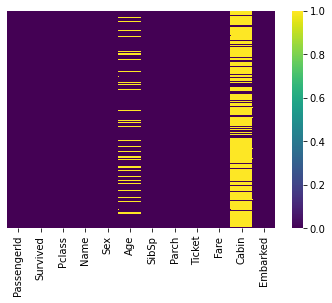

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

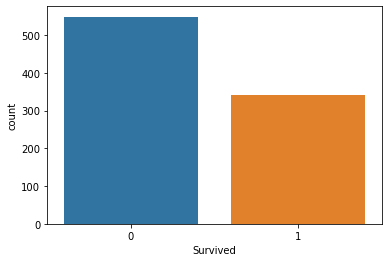

In [7]:
sns.set_style=('whitegrid')
sns.countplot('Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

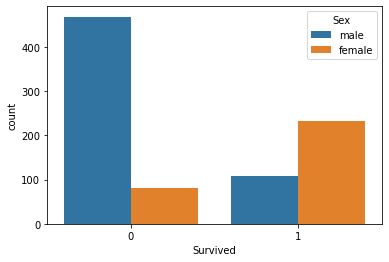

In [8]:
sns.countplot('Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

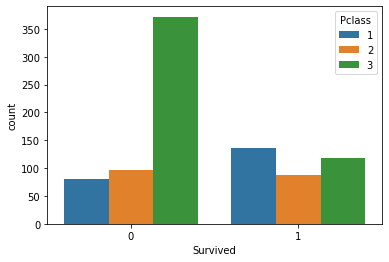

In [9]:
sns.countplot('Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Age'>

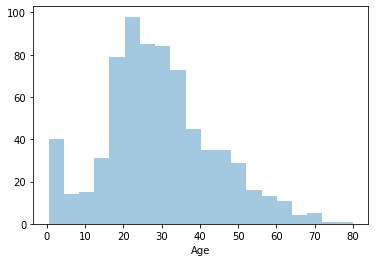

In [10]:
sns.distplot(df['Age'],kde=False)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

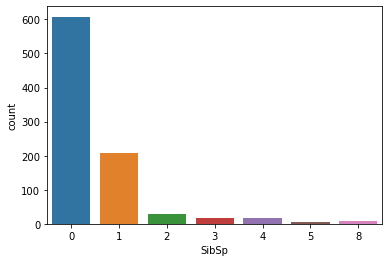

In [11]:
sns.countplot('SibSp',data=df)

now lets check the missing values and manage it

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

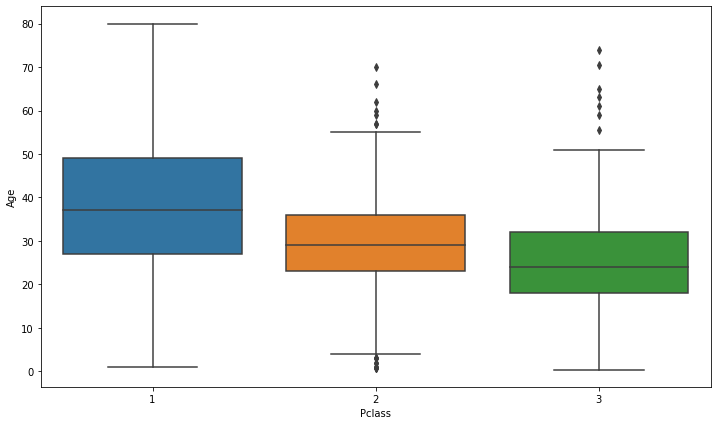

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

by plotting the box plot we can actually measure the 50th percentile of the column and hence apply it as a mean as it is a numerical data

In [13]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==1:
            return 30
        else:
            return 25
    else:
        return Age

In [14]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

by defining a function we applied the mean value to the respective column for filling the nan values

now lets check the heatmap again

<AxesSubplot:>

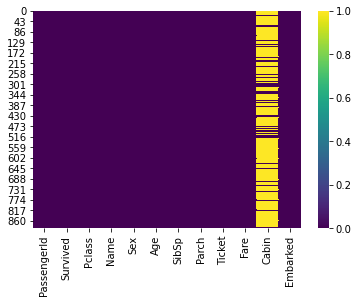

In [15]:
sns.heatmap(df.isnull(),cmap='viridis')

since cabin has very much nan values,we should remove it

In [16]:
df.drop('Cabin',axis=1,inplace=True)


In [17]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

as we can see that name ,passenger id as well as ticket has nothing to do with the training data as well as they are categorical data,so we remove those columns

In [19]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val])


In [23]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [24]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.534238
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

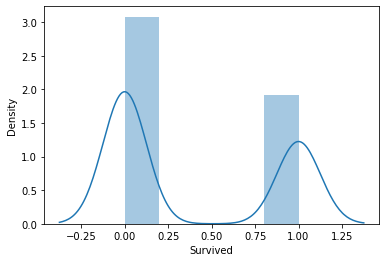

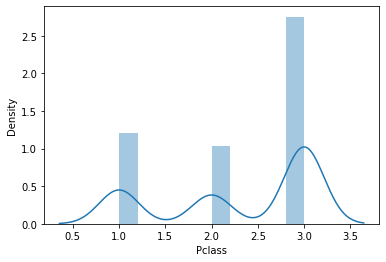

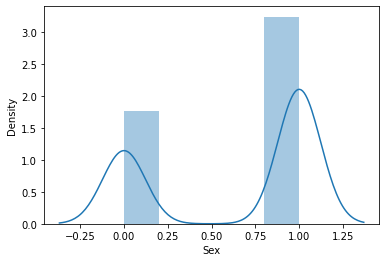

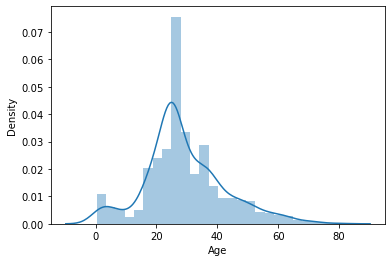

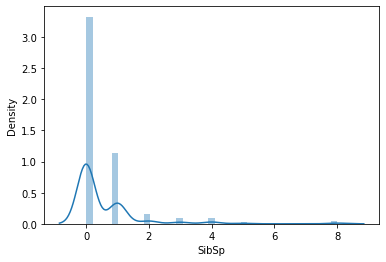

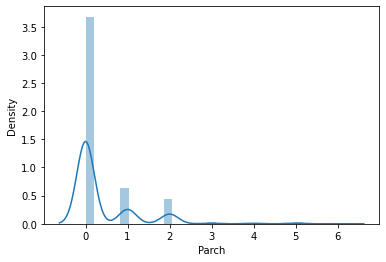

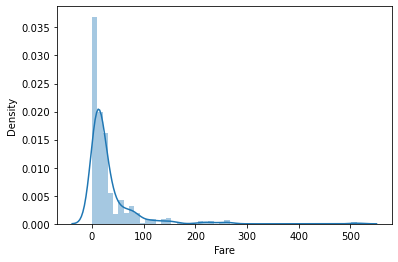

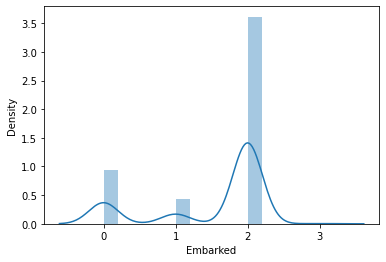

In [25]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:>

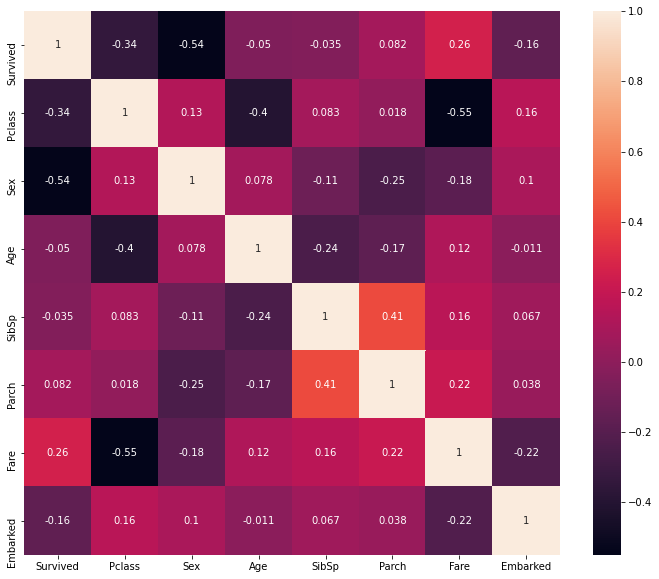

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='black')

now my data is ready for training

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=df.drop('Survived',axis=1)


In [29]:
y=df.iloc[:,0:1]

In [30]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(classification_report(y_test,predlr))
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       171
           1       0.71      0.67      0.69        97

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

0.7798507462686567
[[144  27]
 [ 32  65]]


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(classification_report(y_test,preddtc))
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       171
           1       0.72      0.65      0.68        97

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268

0.7835820895522388
[[147  24]
 [ 34  63]]


In [36]:
from sklearn.svm import SVC

In [37]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(classification_report(y_test,predsvc))
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       171
           1       0.71      0.28      0.40        97

    accuracy                           0.70       268
   macro avg       0.70      0.61      0.60       268
weighted avg       0.70      0.70      0.65       268

0.6977611940298507
[[160  11]
 [ 70  27]]


In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gb=GaussianNB()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(classification_report(y_test,predgb))
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       171
           1       0.69      0.69      0.69        97

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

0.7761194029850746
[[141  30]
 [ 30  67]]


now cross validation for various models

In [40]:
pred_dtc=dtc.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_dtc)
for j in range(2,10):
    lsscore=cross_val_score(dtc,x,y,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 76.9922406409029
accuracy score is: 78.35820895522389
/n
at cv: 3
cross val score is: 78.33894500561168
accuracy score is: 78.35820895522389
/n
at cv: 4
cross val score is: 77.77794610754252
accuracy score is: 78.35820895522389
/n
at cv: 5
cross val score is: 76.54698386793045
accuracy score is: 78.35820895522389
/n
at cv: 6
cross val score is: 79.4606687224137
accuracy score is: 78.35820895522389
/n
at cv: 7
cross val score is: 78.56879218222723
accuracy score is: 78.35820895522389
/n
at cv: 8
cross val score is: 78.23761261261262
accuracy score is: 78.35820895522389
/n
at cv: 9
cross val score is: 78.56341189674522
accuracy score is: 78.35820895522389
/n


at cv4 the model is performing well:

In [41]:
pred_gb=gb.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_gb)
for j in range(2,10):
    lsscore=cross_val_score(gb,x,y,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 78.22819569708268
accuracy score is: 77.61194029850746
/n
at cv: 3
cross val score is: 78.675645342312
accuracy score is: 77.61194029850746
/n
at cv: 4
cross val score is: 78.45311679392397
accuracy score is: 77.61194029850746
/n
at cv: 5
cross val score is: 79.01512773837173
accuracy score is: 77.61194029850746
/n
at cv: 6
cross val score is: 78.67842674889654
accuracy score is: 77.61194029850746
/n
at cv: 7
cross val score is: 78.45366985376828
accuracy score is: 77.61194029850746
/n
at cv: 8
cross val score is: 78.56841216216215
accuracy score is: 77.61194029850746
/n
at cv: 9
cross val score is: 78.67564534231202
accuracy score is: 77.61194029850746
/n


In [42]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 79.34902000302313
accuracy score is: 77.98507462686567
/n
at cv: 3
cross val score is: 80.02244668911335
accuracy score is: 77.98507462686567
/n
at cv: 4
cross val score is: 79.91253585423989
accuracy score is: 77.98507462686567
/n
at cv: 5
cross val score is: 79.46331052664617
accuracy score is: 77.98507462686567
/n
at cv: 6
cross val score is: 79.79699498155875
accuracy score is: 77.98507462686567
/n
at cv: 7
cross val score is: 79.91159308211473
accuracy score is: 77.98507462686567
/n
at cv: 8
cross val score is: 80.24754665379665
accuracy score is: 77.98507462686567
/n
at cv: 9
cross val score is: 79.91021324354658
accuracy score is: 77.98507462686567
/n


In [43]:
lsscore_selected=cross_val_score(dtc,x,y,cv=4).mean()
print("the cv score is:",lsscore_selected,"/nThe accuracy_score is ",lss)

the cv score is: 0.7788954874156668 /nThe accuracy_score is  0.7798507462686567


importing auc roc curve

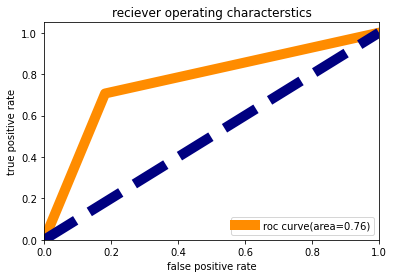

In [50]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_lr,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='roc curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characterstics")
plt.legend(loc='lower right')
plt.show()